In [1]:
%pylab inline

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [27]:
df = pd.read_csv('./data/movieData.csv', parse_dates=['Thursday'])
df['dayofyear'] = df.groupby('name')['Thursday'].transform(lambda x: x.dt.dayofyear)
df['name'] = df['name'].str.lower()
df.head()

,Rank,WeeklyGross,PctChangeWkGross,Theaters,DeltaTheaters,AvgRev,GrossToDate,Week,Thursday,name,year,dayofyear
0,17.0,967378,NaN,14.0,NaN,69098.0,967378,1,1990-11-18,dances with wolves,1990,322
1,9.0,3871641,300.0,14.0,NaN,276546.0,4839019,2,1990-11-25,dances with wolves,1990,329
2,3.0,12547813,224.0,1048.0,1034.0,11973.0,17386832,3,1990-12-02,dances with wolves,1990,336
3,4.0,9246632,-26.3,1053.0,5.0,8781.0,26633464,4,1990-12-09,dances with wolves,1990,343
4,4.0,7272350,-21.4,1051.0,-2.0,6919.0,33905814,5,1990-12-16,dances with wolves,1990,350


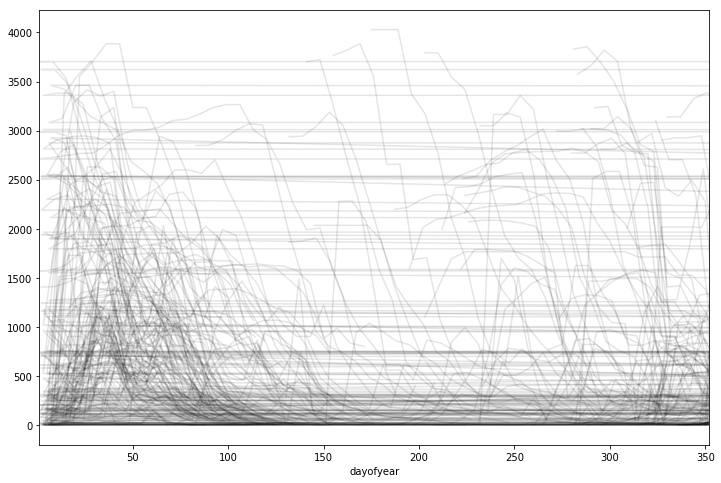

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))

_ = df.groupby('name').plot(x='dayofyear', y='Theaters', ax=ax, color='k', alpha=.1)
ax.legend().set_visible(False)

## Pemieres

The premiere is going to be the first row of data

In [99]:
premieres = df.groupby('name').first().reset_index()
premieres.head()

,name,Rank,WeeklyGross,PctChangeWkGross,Theaters,DeltaTheaters,AvgRev,GrossToDate,Week,Thursday,year,dayofyear
0,12 years a slave,15.0,1259943,130.0,19.0,104.0,66313.0,1259943,1,2013-10-24,2013,297
1,127 hours,27.0,372989,64.3,4.0,18.0,93247.0,372989,1,2010-11-11,2010,315
2,a beautiful mind,13.0,5930676,158.0,11.0,514.0,539152.0,5930676,1,2001-12-27,2001,361
3,a few good men,1.0,20856522,-18.6,1925.0,187.0,10835.0,20856522,1,1992-12-17,1992,352
4,a serious man,29.0,351986,84.3,6.0,15.0,58664.0,351986,1,2009-10-08,2009,281


If you had the sneaking suspicion that more movies were releasing closer to the end of the year, you were right.

Text(0.5,1,'Best Picture Nominee Premiere by Day of Year')

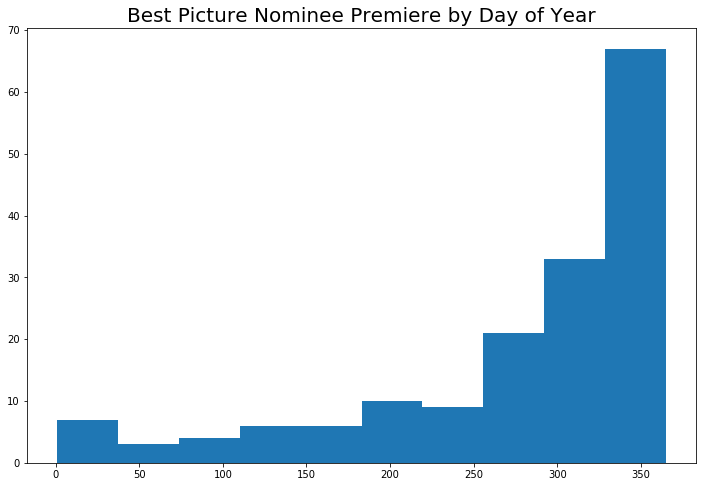

In [98]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.hist(premieres['Thursday'].dt.dayofyear)
ax.set_title('Best Picture Nominee Premiere by Day of Year', size=20)

That trend has only gotten worse as time goes on.

Text(0.5,1,'Best Picture Nominee Release Day of Year (By Year)')

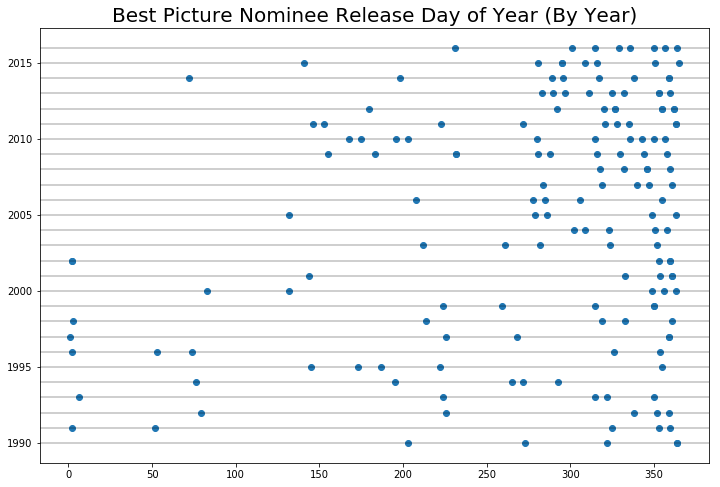

In [131]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(premieres['Thursday'].dt.dayofyear, premieres['year'])#, c=premieres['Rank'])
_ = [ax.axhline(i, color='k', alpha=.25) for i in range(1990, 2017)]
ax.set_title('Best Picture Nominee Release Day of Year (By Year)', size=20)

In [128]:
fn = lambda x: pd.cut(x, bins=[0, 100, 200, 300, 365], labels=['1st', '2nd', '3rd', '4th'])
premieres['releaseQuarter'] = premieres.groupby('year')['dayofyear'].apply(fn)

releasePctByQuarter = premieres.groupby('year')['releaseQuarter'].value_counts().unstack().fillna(0)

Text(0.5,1,'Premiere Release by Quarter')

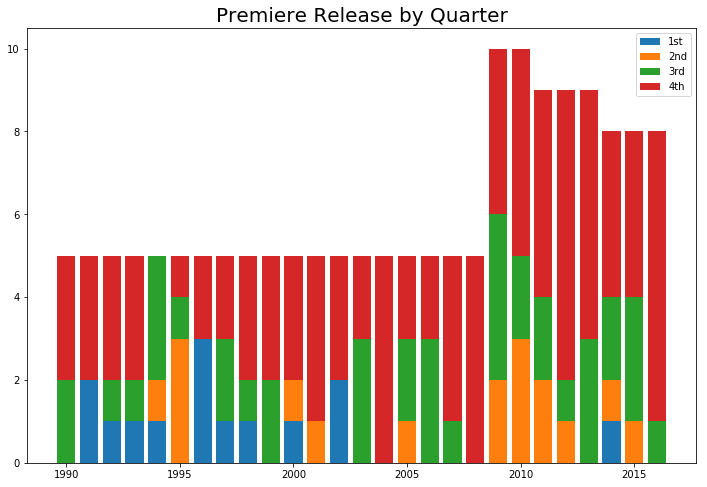

In [130]:
fig, ax = plt.subplots(figsize=(12, 8))

x = releasePctByQuarter.index
y1, y2, y3, y4 = [releasePctByQuarter[x].values for x in releasePctByQuarter]
ax.bar(x, y1)
ax.bar(x, y2, bottom=y1)
ax.bar(x, y3, bottom=y2+y1)
ax.bar(x, y4, bottom=y3+y2+y1)
plt.legend(releasePctByQuarter.columns)

ax.set_title('Premiere Release by Quarter', size=20)

### Release vs Award Data

In [38]:
academy = pd.read_csv('./data/oscarsDates.csv', parse_dates=['announcement', 'show'])
academy.head()

,year,announcement,show,best_picture_noms,nielsen
0,2016,2017-01-24,2017-02-26,9,32.9
1,2015,2016-01-14,2016-02-28,8,34.4
2,2014,2015-01-15,2015-02-22,8,37.3
3,2013,2014-01-16,2014-03-02,9,43.7
4,2012,2013-01-10,2013-02-24,9,40.4


In [135]:
allIn_pre = premieres.merge(academy)

allIn['days_before_announcement'] = (allIn['announcement'] - allIn['Thursday']).dt.days
allIn['days_before_show'] = (allIn['show'] - allIn['Thursday']).dt.days

In [93]:
allIn.corr()

,Rank,WeeklyGross,PctChangeWkGross,Theaters,DeltaTheaters,AvgRev,GrossToDate,Week,year,best_picture_noms,nielsen,days_before_announcement,days_before_show
Rank,1.000000,-0.520855,-0.078554,-0.668505,0.101866,0.098628,-0.521083,-0.191599,0.247107,0.021397,-0.268496,-0.209932,-0.216378
WeeklyGross,-0.520855,1.000000,-0.047451,0.800905,-0.226338,-0.209603,0.999676,0.016594,0.042938,0.177862,0.053745,0.193774,0.192676
PctChangeWkGross,-0.078554,-0.047451,1.000000,-0.061347,0.323784,-0.054338,-0.047816,-0.090960,0.046036,0.126831,0.004833,0.055181,0.050177
Theaters,-0.668505,0.800905,-0.061347,1.000000,-0.283972,-0.378425,0.799932,-0.092980,0.021244,0.110093,0.077585,0.133759,0.137617
DeltaTheaters,0.101866,-0.226338,0.323784,-0.283972,1.000000,0.238771,-0.227504,-0.032451,0.114748,0.088144,-0.129532,-0.165764,-0.166658
AvgRev,0.098628,-0.209603,-0.054338,-0.378425,0.238771,1.000000,-0.211881,0.068375,0.194613,0.150735,-0.194527,-0.031332,-0.034727
GrossToDate,-0.521083,0.999676,-0.047816,0.799932,-0.227504,-0.211881,1.000000,0.033065,0.039502,0.175229,0.055075,0.198895,0.197909
Week,-0.191599,0.016594,-0.090960,-0.092980,-0.032451,0.068375,0.033065,1.000000,-0.178868,-0.093995,0.108488,0.158569,0.162405
year,0.247107,0.042938,0.046036,0.021244,0.114748,0.194613,0.039502,-0.178868,1.000000,0.776033,-0.626758,-0.236434,-0.246647
best_picture_noms,0.021397,0.177862,0.126831,0.110093,0.088144,0.150735,0.175229,-0.093995,0.776033,1.000000,-0.350875,-0.088971,-0.094099


In [134]:
closings = df.groupby('name').last().reset_index()
closings.head()

,name,Rank,WeeklyGross,PctChangeWkGross,Theaters,DeltaTheaters,AvgRev,GrossToDate,Week,Thursday,year,dayofyear
0,12 years a slave,72.0,12460,-49.6,20.0,-12.0,623.0,56671993,29,2014-05-08,2013,128
1,127 hours,72.0,11084,-24.5,12.0,-6.0,924.0,18335230,23,2011-04-14,2010,104
2,a beautiful mind,28.0,177775,-25.1,202.0,-91.0,880.0,170742341,23,2002-05-30,2001,150
3,a few good men,17.0,255462,-54.9,204.0,-194.0,1252.0,140384814,25,1993-06-03,1992,154
4,a serious man,35.0,130332,7.0,49.0,-68.0,2660.0,9228768,14,2010-01-07,2009,7


In [136]:
allIn_post = closings.merge(academy)

## Effect of announcement on theaters

In [225]:
def plot_year_releases(df, year):
    fig, ax = plt.subplots(figsize=(16, 8))
    for name, group in df[df['year'] == year].groupby('name'):
        group.plot(x='Thursday', y='Theaters', ax=ax, label=name)
        announcement, show = academy[academy['year'] == year][['announcement', 'show']].values[0]
        plt.axvline(pd.Timestamp(announcement), c='k', alpha=.5)
        plt.axvline(pd.Timestamp(show), c='k', alpha=.5)
    return ax

Starts off pretty boring

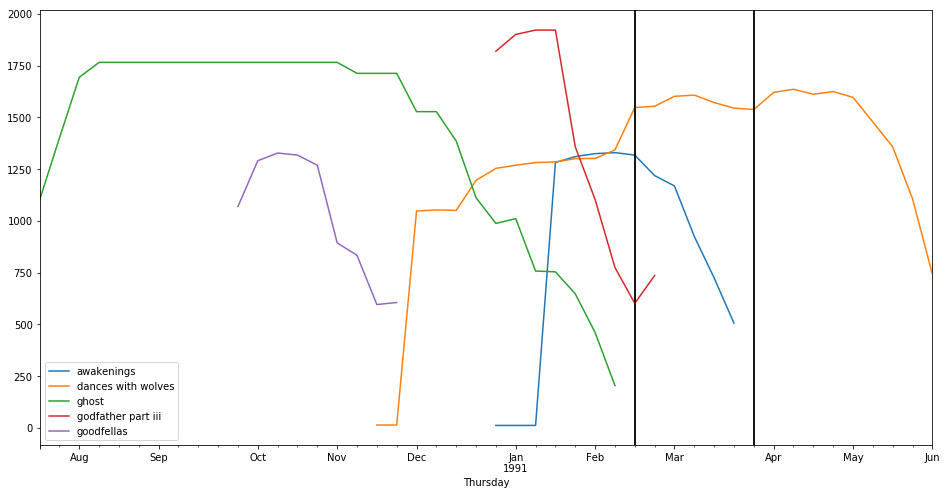

In [226]:
plot_year_releases(df, 1990)

Curiously, Silence of the Lambs was way before everything else

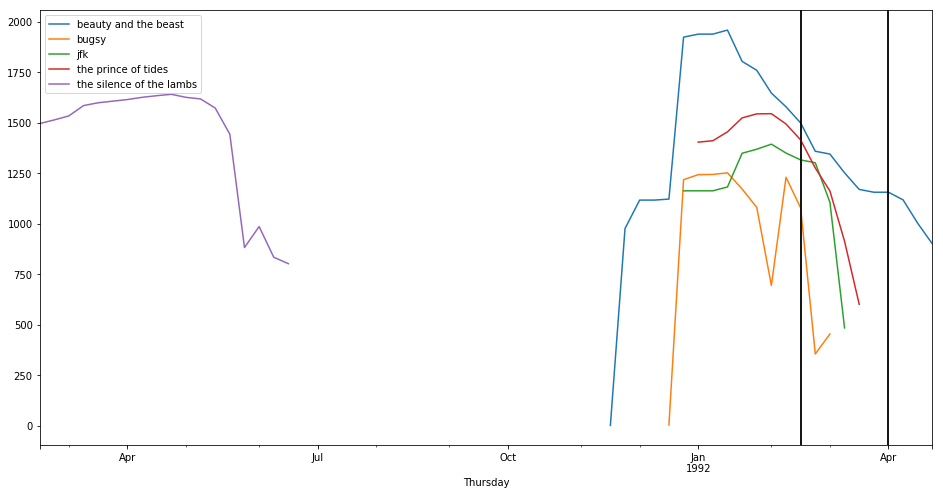

In [227]:
plot_year_releases(df, 1991)

The Crying Game

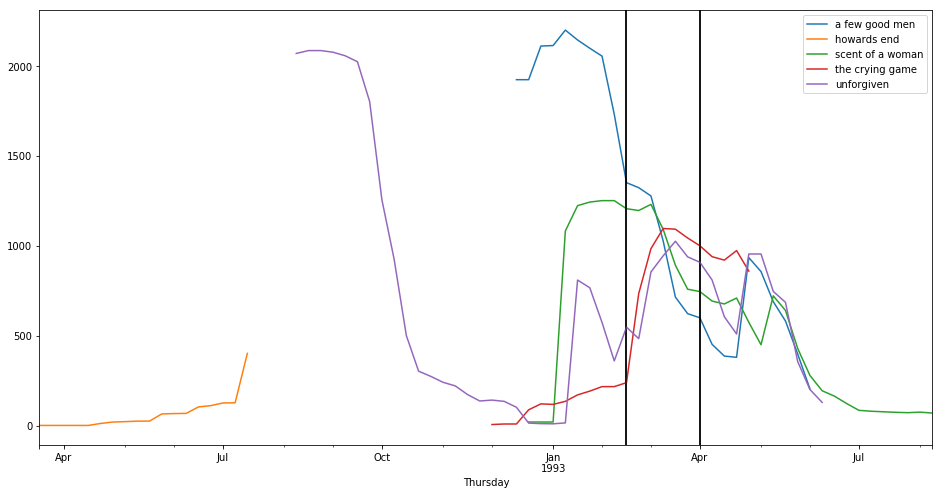

In [228]:
plot_year_releases(df, 1992)

93-96 were boring

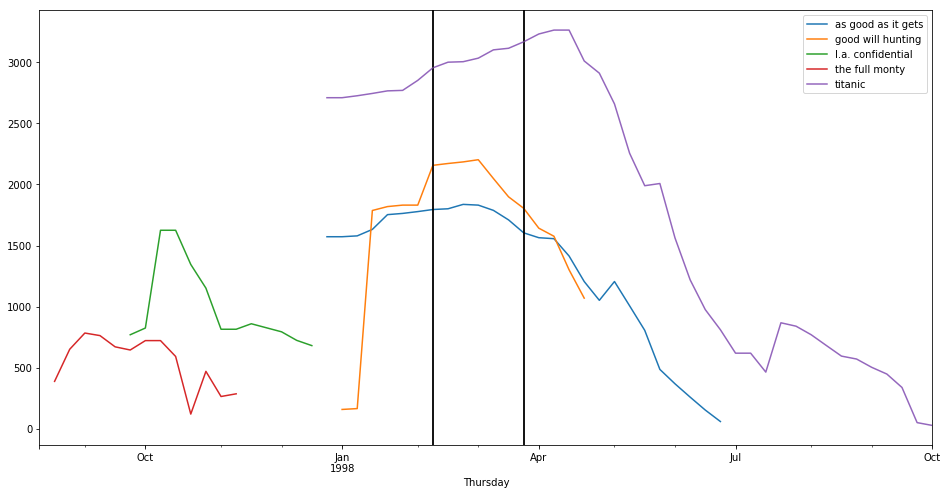

In [233]:
plot_year_releases(df, 1997)

Titanic won, and that was huge

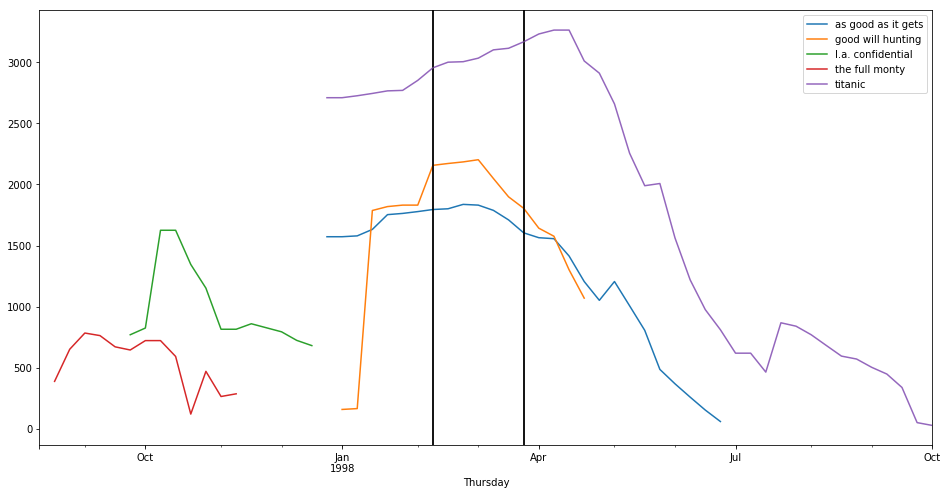

In [233]:
plot_year_releases(df, 1997)

American Beauty drops off hard, and then the announcement

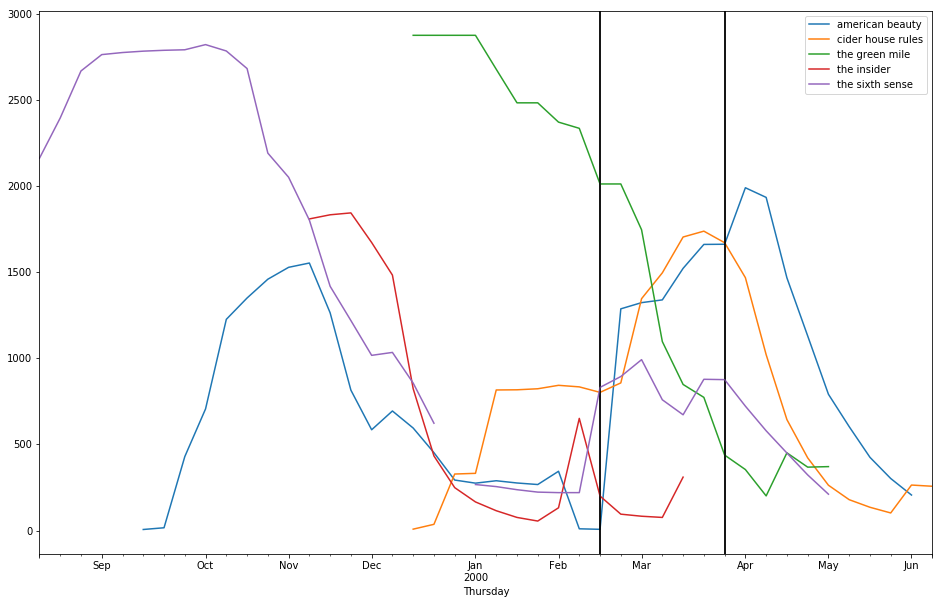

In [219]:
plot_year_releases(df, 1999)

Oscar Buzz started happening.

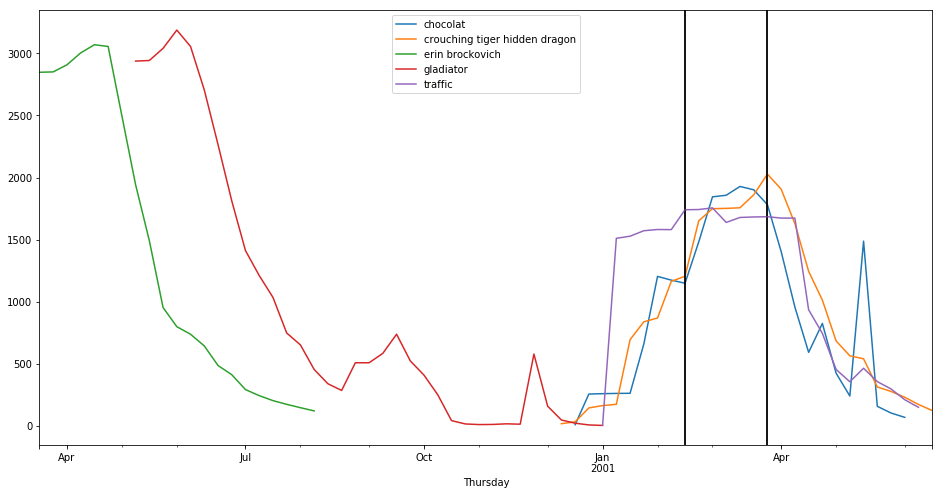

In [237]:
plot_year_releases(df, 2000)

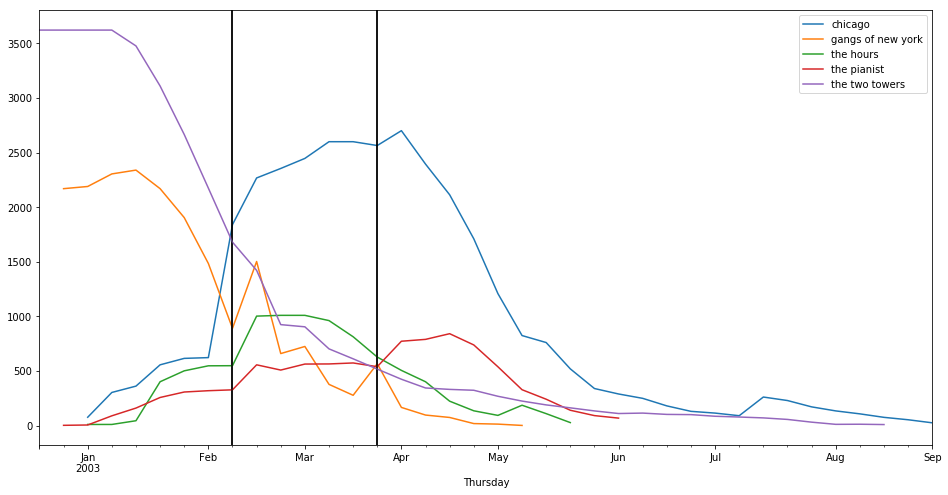

In [239]:
plot_year_releases(df, 2002)

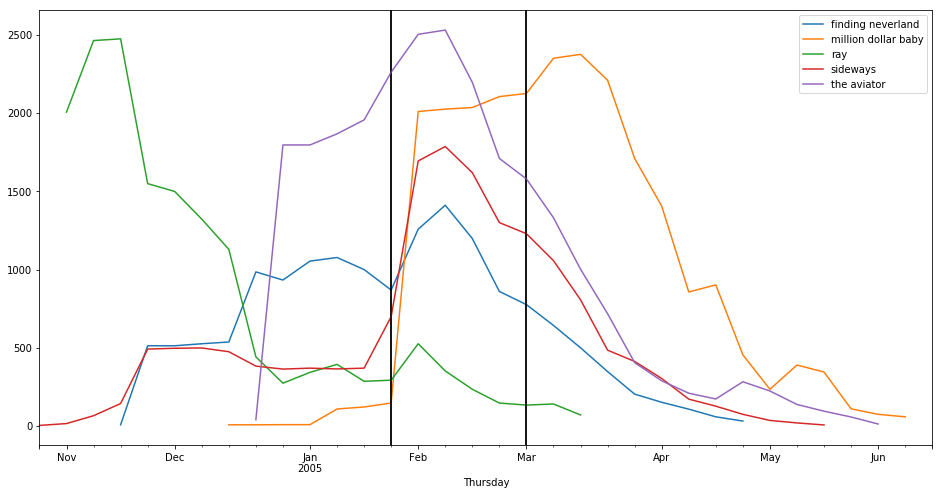

In [241]:
plot_year_releases(df, 2004)

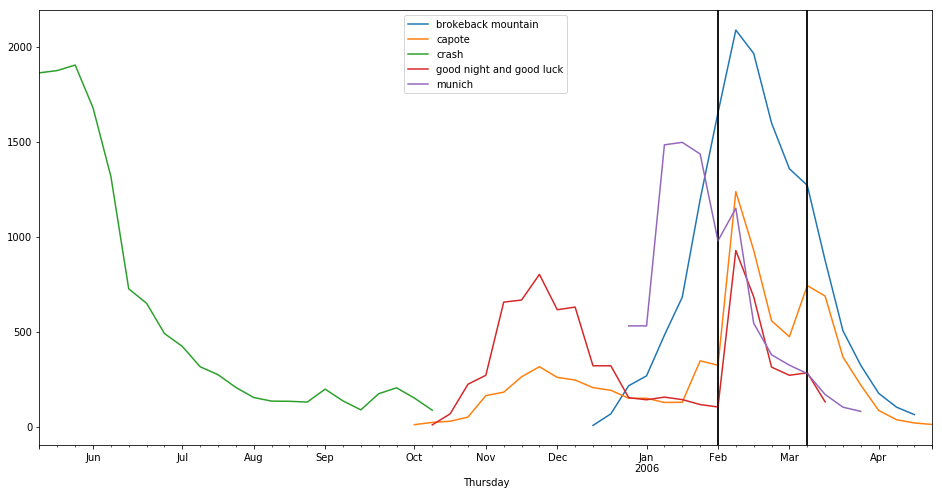

In [242]:
plot_year_releases(df, 2005)

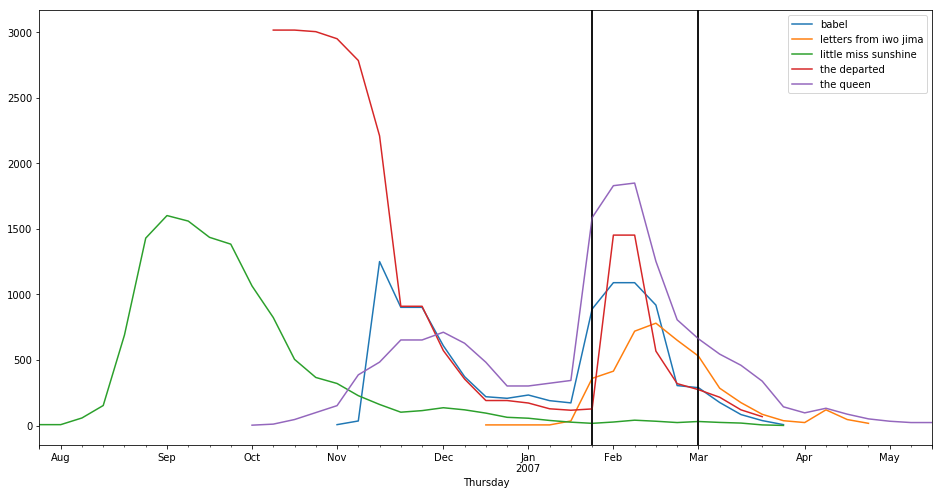

In [243]:
plot_year_releases(df, 2006)

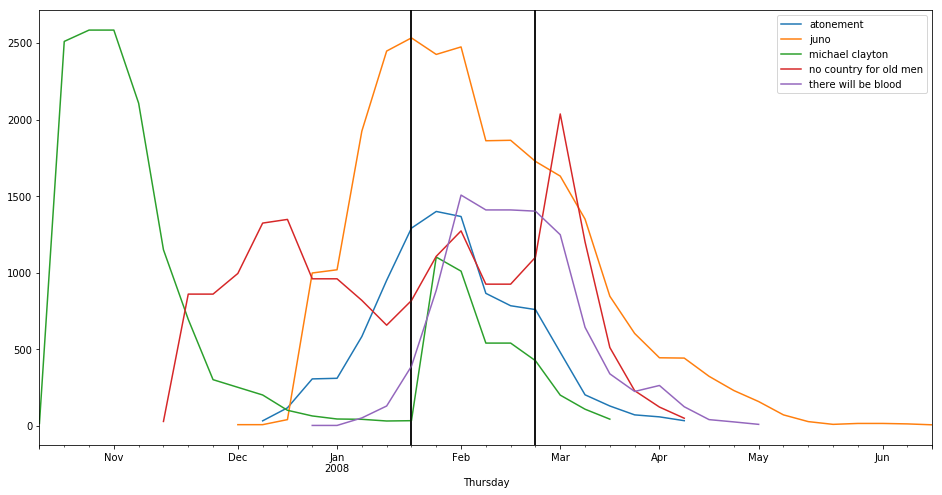

In [244]:
plot_year_releases(df, 2007)

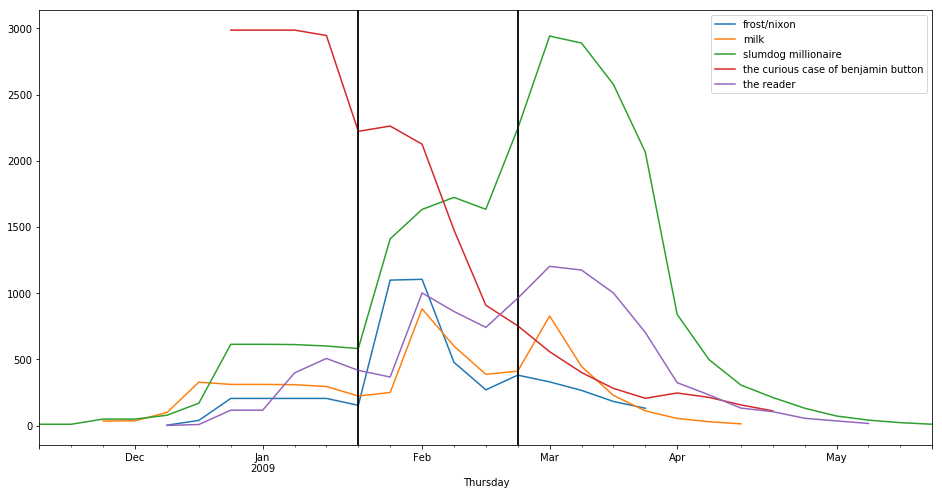

In [245]:
plot_year_releases(df, 2008)

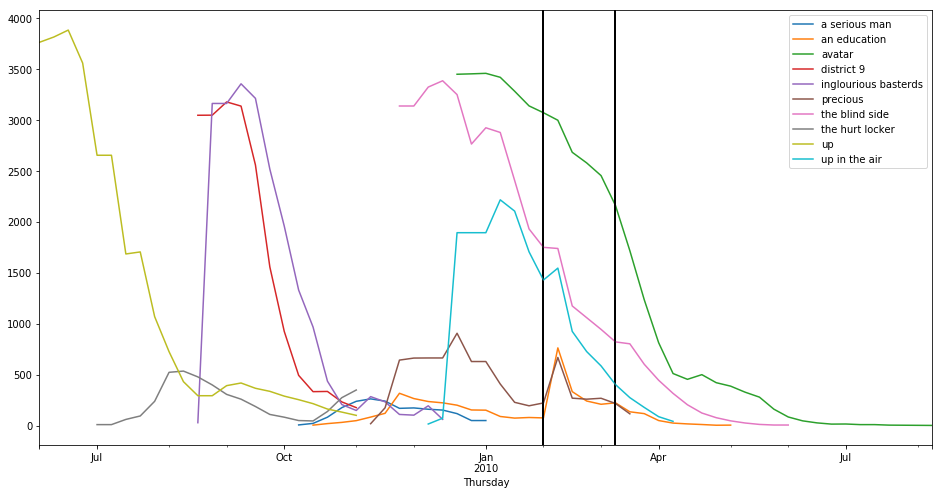

In [246]:
plot_year_releases(df, 2009)

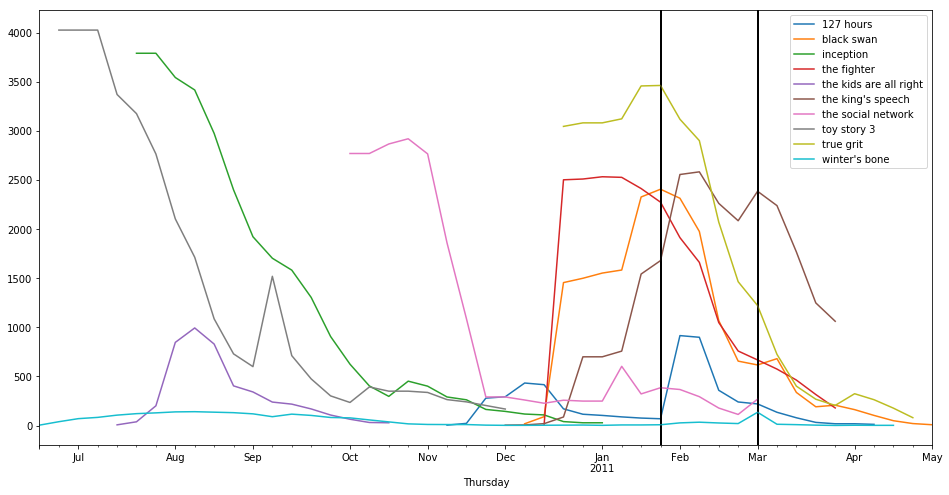

In [247]:
plot_year_releases(df, 2010)

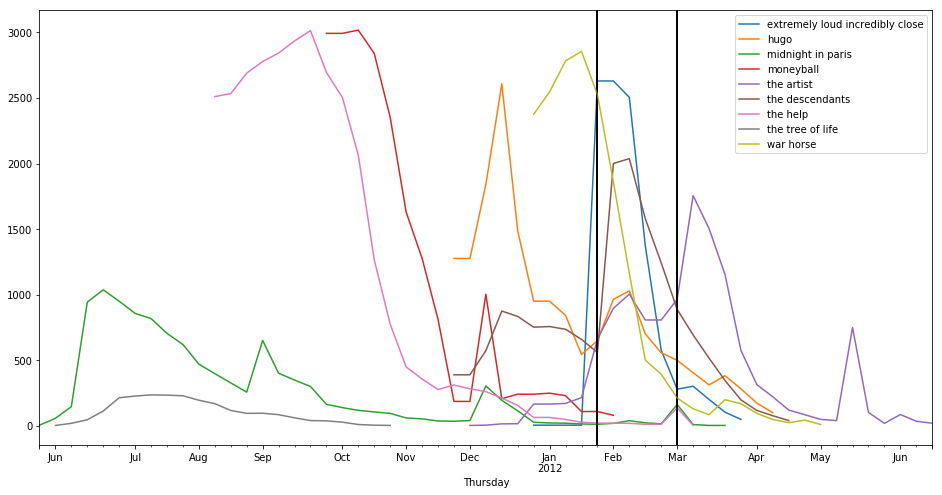

In [248]:
plot_year_releases(df, 2011)

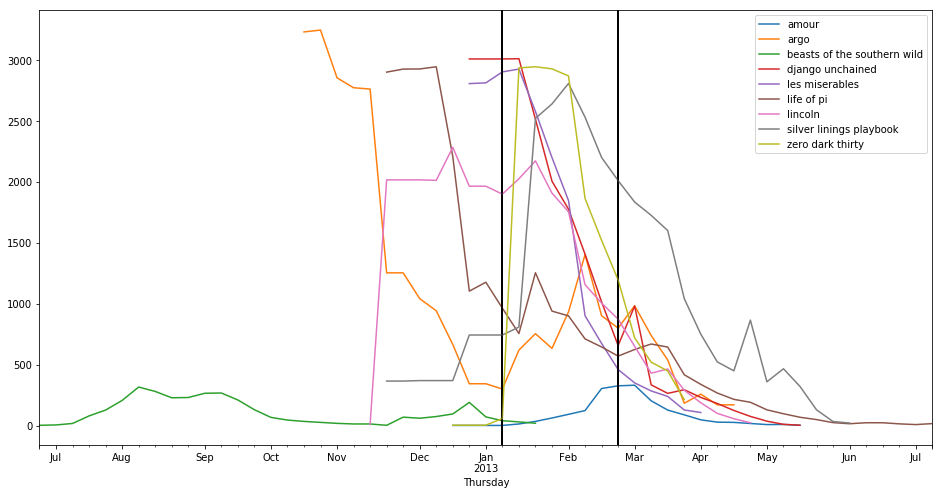

In [249]:
plot_year_releases(df, 2012)

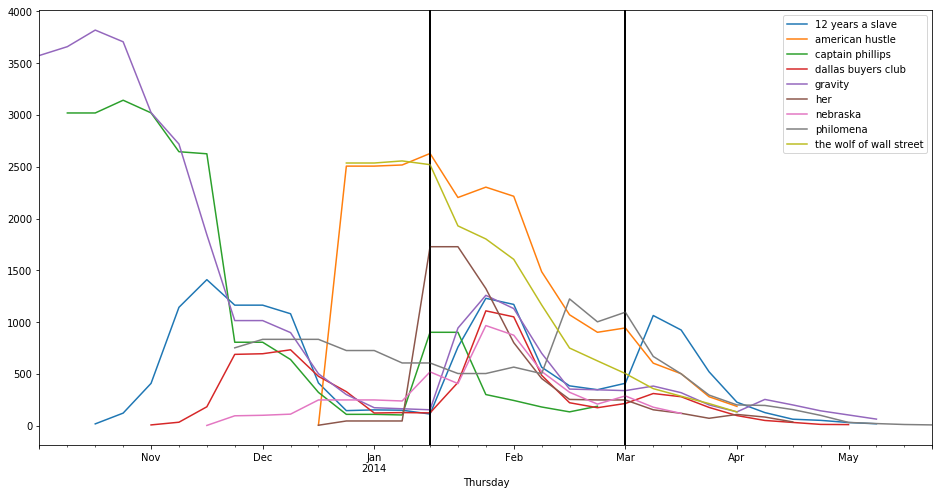

In [250]:
plot_year_releases(df, 2013)

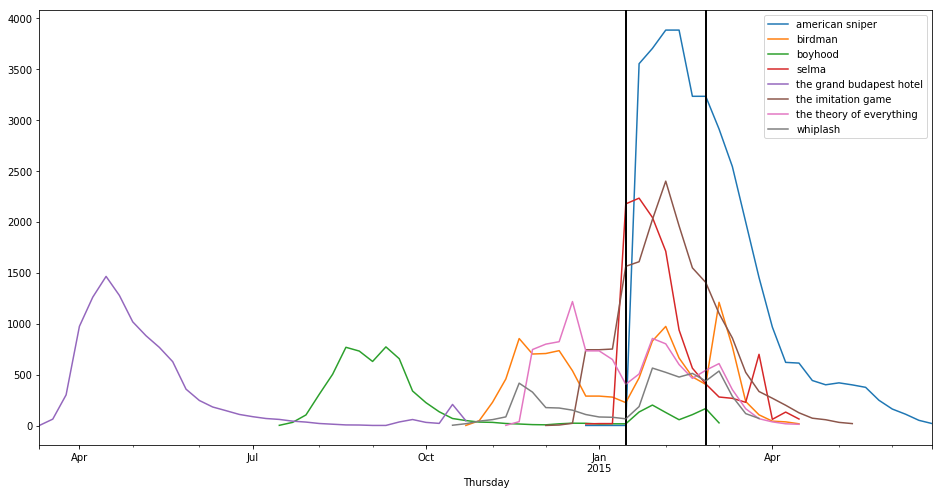

In [251]:
plot_year_releases(df, 2014)

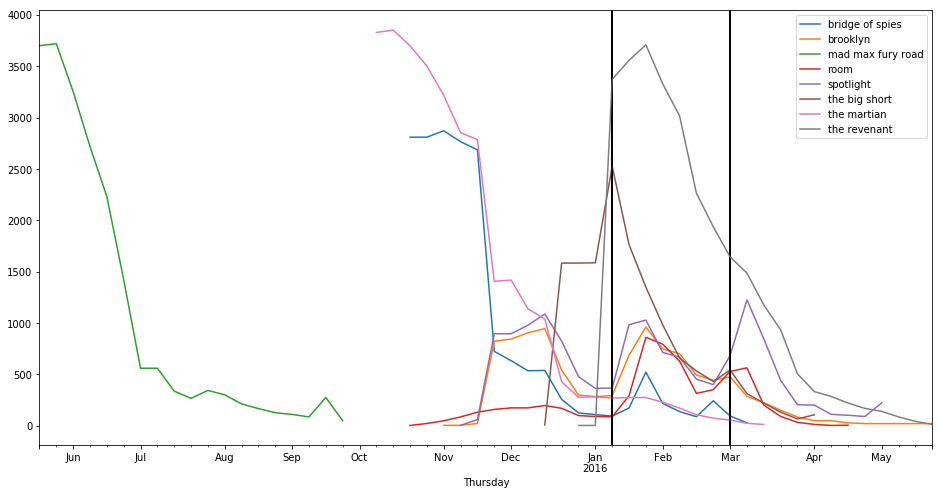

In [252]:
plot_year_releases(df, 2015)

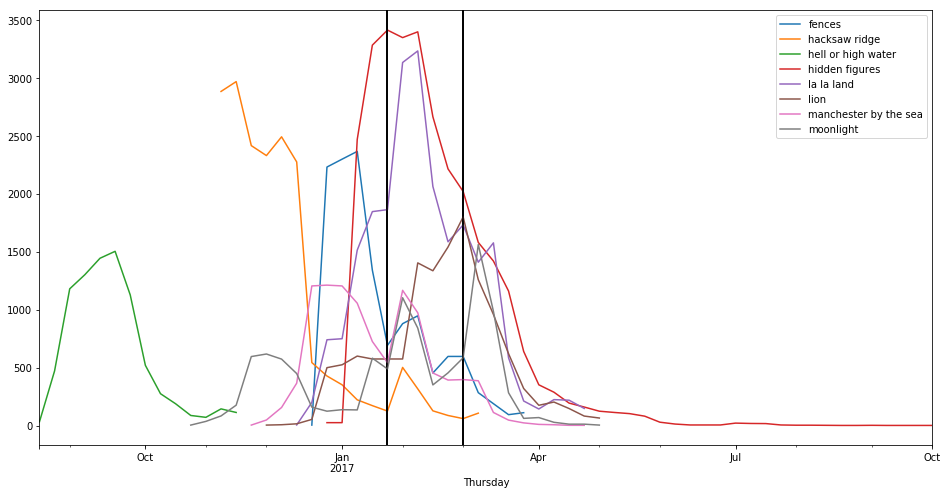

In [253]:
plot_year_releases(df, 2016)